<a href="https://colab.research.google.com/github/2303A52464/STML/blob/main/2303A52464(STML__Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**STML PROJECT**

**Name- R.Akshitha**

**HT.No- 2303A52464**

**Batch- 36**



# **DATASET :**

# **CUSTOMER** **FEEDBACK** **SATISFACTION**

In [ ]:
import pandas as pd
import numpy as np
d=pd.read_csv("/content/customer_feedback_satisfaction.csv")
print(d.head())

   CustomerID  Age  Gender Country  Income  ProductQuality  ServiceQuality  \
0           1   56    Male      UK   83094               5               8   
1           2   69    Male      UK   86860              10               2   
2           3   46  Female     USA   60173               8              10   
3           4   32  Female      UK   73884               7              10   
4           5   60    Male      UK   97546               6               4   

   PurchaseFrequency FeedbackScore LoyaltyLevel  SatisfactionScore  
0                  5           Low       Bronze              100.0  
1                  8        Medium         Gold              100.0  
2                 18        Medium       Silver              100.0  
3                 16           Low         Gold              100.0  
4                 13           Low       Bronze               82.0  


In [ ]:
X=d.drop(['SatisfactionScore','CustomerID'],axis=1)
mle_params={}
y=d["SatisfactionScore"]
print("target:")
print(y.head())
print("shape:",y.shape)
print("features:")
print(X.head())

target:
0    100.0
1    100.0
2    100.0
3    100.0
4     82.0
Name: SatisfactionScore, dtype: float64
shape: (38444,)
features:
   Age  Gender Country  Income  ProductQuality  ServiceQuality  \
0   56    Male      UK   83094               5               8   
1   69    Male      UK   86860              10               2   
2   46  Female     USA   60173               8              10   
3   32  Female      UK   73884               7              10   
4   60    Male      UK   97546               6               4   

   PurchaseFrequency FeedbackScore LoyaltyLevel  
0                  5           Low       Bronze  
1                  8        Medium         Gold  
2                 18        Medium       Silver  
3                 16           Low         Gold  
4                 13           Low       Bronze  


In [ ]:
S=X.replace({'Female':0,'Male':1,'High':2,'Medium':1,'Low':0,'Gold':2,'Silver':1,'Bronze':0,'Canada':2,'UK':1,'USA':0,'Germany':3,'France':4})
print(S.head())

   Age  Gender  Country  Income  ProductQuality  ServiceQuality  \
0   56       1        1   83094               5               8   
1   69       1        1   86860              10               2   
2   46       0        0   60173               8              10   
3   32       0        1   73884               7              10   
4   60       1        1   97546               6               4   

   PurchaseFrequency  FeedbackScore  LoyaltyLevel  
0                  5              0             0  
1                  8              1             2  
2                 18              1             1  
3                 16              0             2  
4                 13              0             0  


<ipython-input-23-7731c8c834ae>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  S=X.replace({'Female':0,'Male':1,'High':2,'Medium':1,'Low':0,'Gold':2,'Silver':1,'Bronze':0,'Canada':2,'UK':1,'USA':0,'Germany':3,'France':4})


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(S, y , test_size=0.2, random_state=30)
print("X_train:",X_train)
print("X_test:",X_test)
print("Y_train:",y_train)
print("Y_train:",y_test)

X_train:        Age  Gender  Country  Income  ProductQuality  ServiceQuality  \
13319   30       1        3   42561               8               6   
10974   18       0        4   93466               6               8   
30192   54       0        3   79572               4               2   
11919   28       1        0   88907               1               3   
12778   56       0        2   53725               5               2   
...    ...     ...      ...     ...             ...             ...   
37627   60       1        1   57976               1              10   
30517   63       1        4   82105               4               6   
919     68       0        0  103090               3               5   
33268   54       1        4   52467               2               8   
4517    65       1        1   61251               7               8   

       PurchaseFrequency  FeedbackScore  LoyaltyLevel  
13319                  2              0             1  
10974                 17  

#**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
RR= LinearRegression()
mm=RR.fit(X_train, y_train)
print(mm.intercept_)
print(mm.coef_)

26.936146145629444
[ 1.81693575e-01 -1.89423352e-01 -2.29710557e-03  1.58273713e-04
  3.20981388e+00  3.22432822e+00  3.22211195e-01 -2.72042219e-02
 -2.12629245e-02]


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
print(mean_squared_error(y_train,mm.predict(X_train)))
print(mean_absolute_error(y_train,mm.predict(X_train)))
print(root_mean_squared_error(y_train,mm.predict(X_train)))
print(mean_squared_error(y_test,mm.predict(X_test)))
print(mean_absolute_error(y_test,mm.predict(X_test)))
print(root_mean_squared_error(y_test,mm.predict(X_test)))

85.40795018263863
7.38413624104663
9.241642179972054
86.52308003886873
7.455181831010005
9.301778326689403


#**Learning Curve for Linear Regression**

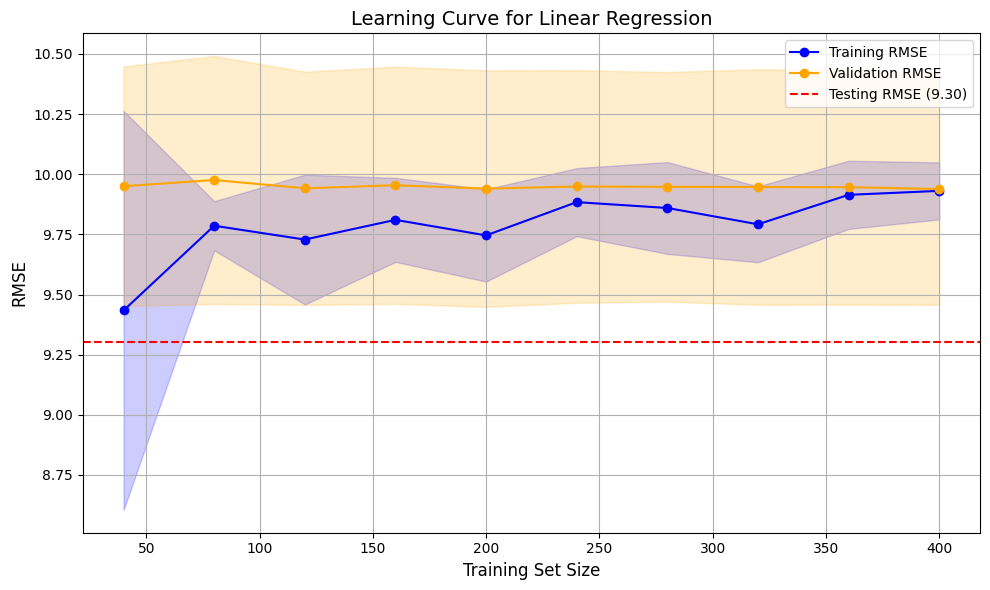

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Generate a synthetic regression dataset (replace this with your real dataset)
X, y = make_regression(n_samples=500, n_features=1, noise=10, random_state=42)

# Define the model
model = LinearRegression()

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X,
    y=y,
    cv=5,  # 5-fold cross-validation
    scoring="neg_mean_squared_error",  # Use MSE (negative because sklearn minimizes scores)
    train_sizes=np.linspace(0.1, 1.0, 10),  # Fractions of training data to use
    n_jobs=-1  # Use all available CPU cores
)

# Convert scores from negative MSE to RMSE
train_scores = np.sqrt(-train_scores)
test_scores = np.sqrt(-test_scores)

# Calculate mean and standard deviation for each training size
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training RMSE")
plt.plot(train_sizes, test_mean, 'o-', color="orange", label="Validation RMSE")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="orange", alpha=0.2)

# Highlight the known testing RMSE value
plt.axhline(y=9.301778326689403, color='red', linestyle='--', label='Testing RMSE (9.30)')

# Add labels, legend, and title
plt.xlabel("Training Set Size", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.title("Learning Curve for Linear Regression", fontsize=14)
plt.legend(loc="upper right", fontsize=10)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


#**SVR**

In [ ]:
from sklearn.svm import SVR
ss= SVR()
sv=ss.fit(X_train, y_train)
print(sv.intercept_)

[89.66640853]


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
print(mean_squared_error(y_train,sv.predict(X_train)))
print(mean_absolute_error(y_train,sv.predict(X_train)))
print(root_mean_squared_error(y_train,sv.predict(X_train)))
print(mean_squared_error(y_test,sv.predict(X_test)))
print(mean_absolute_error(y_test,sv.predict(X_test)))
print(root_mean_squared_error(y_test,sv.predict(X_test)))

304.25093397360615
12.799910905072366
17.442790315015717
308.79132931837466
12.901812166773631
17.572459398683346


#**Learning Curve for SVM**

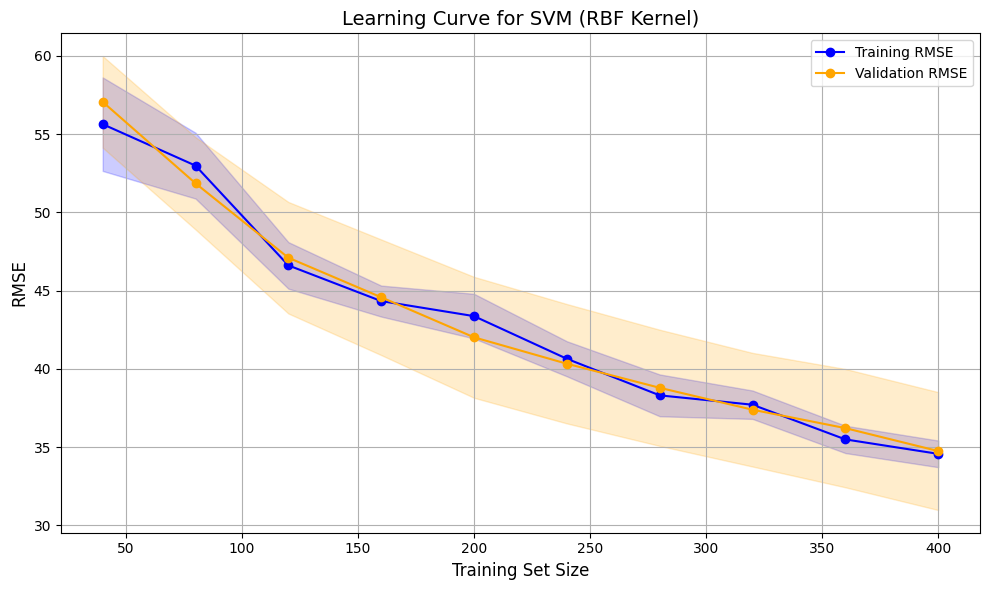

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.svm import SVR
from sklearn.datasets import make_regression

# Generate a synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=1, noise=10, random_state=42)

# Define the SVM model
model = SVR(kernel="rbf")

# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X,
    y=y,
    cv=5,  # 5-fold cross-validation
    scoring="neg_mean_squared_error",  # Use MSE (negative because sklearn minimizes scores)
    train_sizes=np.linspace(0.1, 1.0, 10),  # Fractions of training data to use
    n_jobs=-1  # Use all available CPU cores
)

# Convert scores from negative MSE to RMSE
train_scores = np.sqrt(-train_scores)
test_scores = np.sqrt(-test_scores)

# Calculate mean and standard deviation for each training size
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training RMSE")
plt.plot(train_sizes, test_mean, 'o-', color="orange", label="Validation RMSE")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="orange", alpha=0.2)

# Add labels, legend, and title
plt.xlabel("Training Set Size", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.title("Learning Curve for SVM (RBF Kernel)", fontsize=14)
plt.legend(loc="upper right", fontsize=10)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


#**DecisionTreeRegressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dr= DecisionTreeRegressor()
DR=dr.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
print(mean_squared_error(y_train,DR.predict(X_train)))
print(mean_absolute_error(y_train,DR.predict(X_train)))
print(root_mean_squared_error(y_train,DR.predict(X_train)))
print(mean_squared_error(y_test,DR.predict(X_test)))
print(mean_absolute_error(y_test,DR.predict(X_test)))
print(root_mean_squared_error(y_test,DR.predict(X_test)))

0.0
0.0
0.0
131.74909383534919
7.642979581219924
11.478200810028948


#**Learning Curve For Decision Tree Regressor**

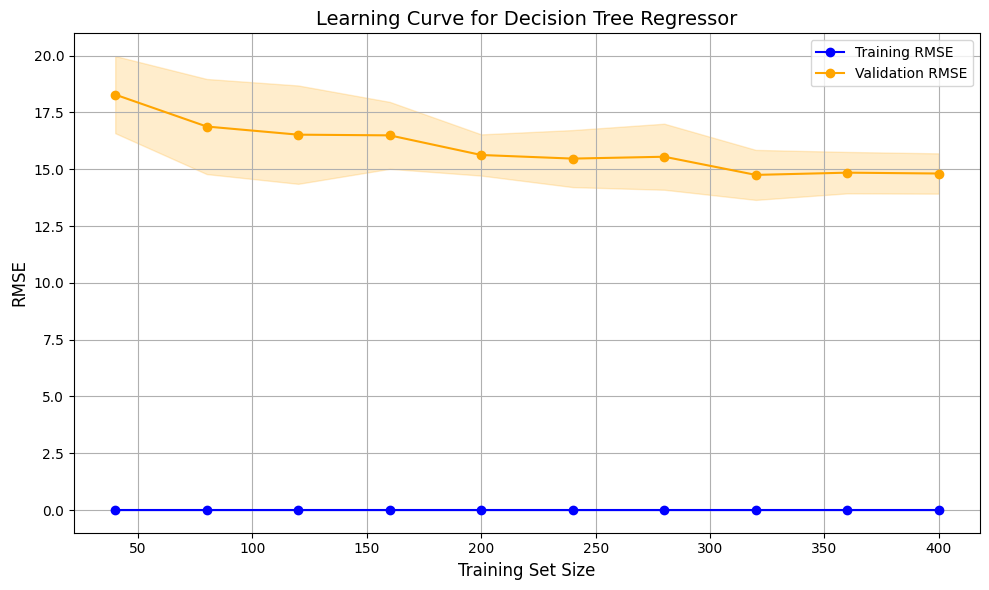

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression

# Generate a synthetic regression dataset (or use your own dataset)
X, y = make_regression(n_samples=500, n_features=1, noise=10, random_state=42)

# Define the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X,
    y=y,
    cv=5,  # 5-fold cross-validation
    scoring="neg_mean_squared_error",  # Use MSE (negative because sklearn minimizes scores)
    train_sizes=np.linspace(0.1, 1.0, 10),  # Fractions of training data to use
    n_jobs=-1  # Use all available CPU cores
)

# Convert scores from negative MSE to RMSE
train_scores = np.sqrt(-train_scores)
test_scores = np.sqrt(-test_scores)

# Calculate mean and standard deviation for each training size
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training RMSE")
plt.plot(train_sizes, test_mean, 'o-', color="orange", label="Validation RMSE")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="orange", alpha=0.2)

# Add labels, legend, and title
plt.xlabel("Training Set Size", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.title("Learning Curve for Decision Tree Regressor", fontsize=14)
plt.legend(loc="upper right", fontsize=10)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


#**RandomForestRegressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
RF=dr.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
print(mean_squared_error(y_train,RF.predict(X_train)))
print(mean_absolute_error(y_train,RF.predict(X_train)))
print(root_mean_squared_error(y_train,RF.predict(X_train)))
print(mean_squared_error(y_test,RF.predict(X_test)))
print(mean_absolute_error(y_test,RF.predict(X_test)))
print(root_mean_squared_error(y_test,RF.predict(X_test)))

0.0
0.0
0.0
131.89325351801276
7.648566783716999
11.484478809158592


#**Learning Curve for Random Forest Regressor**

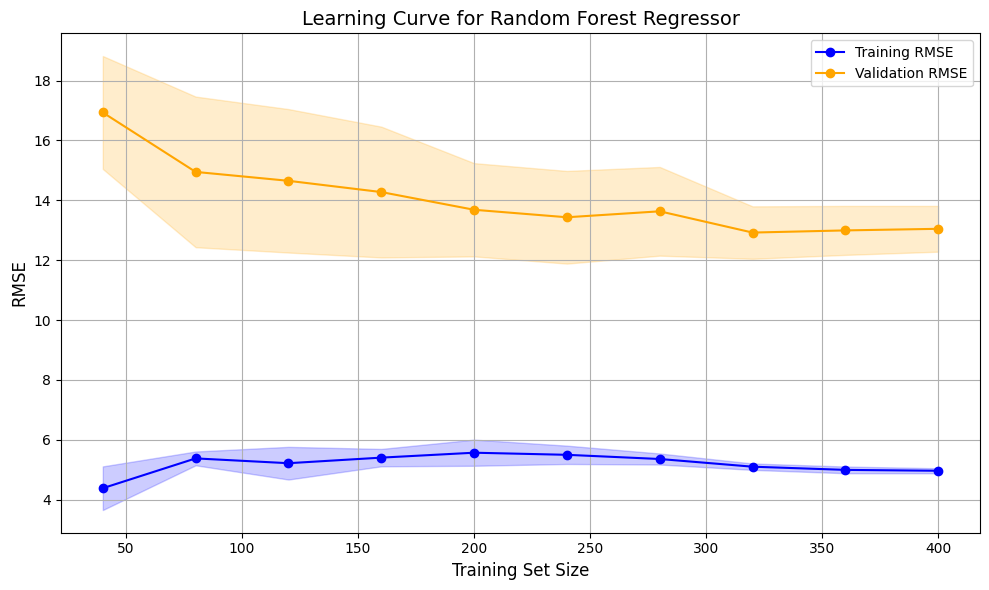

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# Generate a synthetic regression dataset (you can replace this with your own dataset)
X, y = make_regression(n_samples=500, n_features=1, noise=10, random_state=42)

# Define the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X,
    y=y,
    cv=5,  # 5-fold cross-validation
    scoring="neg_mean_squared_error",  # Use MSE (negative because sklearn minimizes scores)
    train_sizes=np.linspace(0.1, 1.0, 10),  # Fractions of training data to use
    n_jobs=-1  # Use all available CPU cores
)

# Convert scores from negative MSE to RMSE
train_scores = np.sqrt(-train_scores)
test_scores = np.sqrt(-test_scores)

# Calculate mean and standard deviation for each training size
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training RMSE")
plt.plot(train_sizes, test_mean, 'o-', color="orange", label="Validation RMSE")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="orange", alpha=0.2)

# Add labels, legend, and title
plt.xlabel("Training Set Size", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.title("Learning Curve for Random Forest Regressor", fontsize=14)
plt.legend(loc="upper right", fontsize=10)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


#**Comparison of RMSE Values**

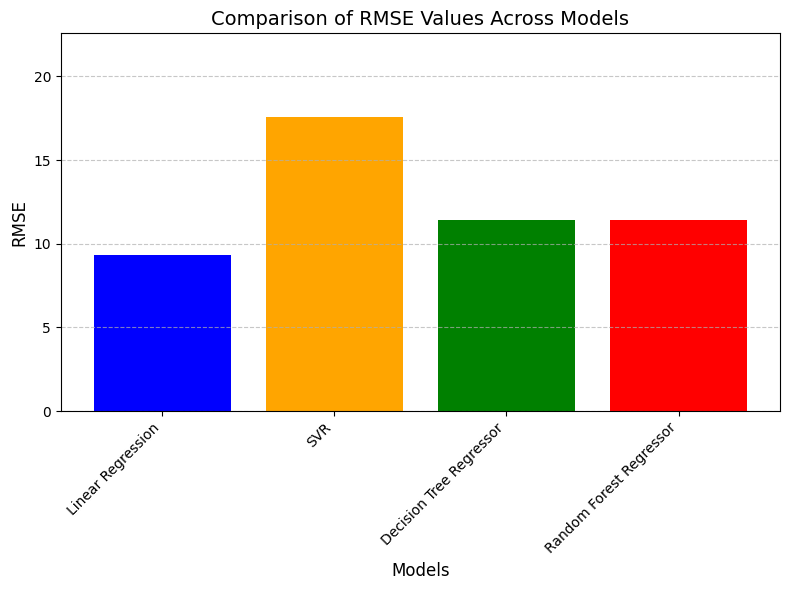

In [ ]:
import matplotlib.pyplot as plt

# Model names and corresponding RMSE values
models = [
    "Linear Regression",
    "SVR",
    "Decision Tree Regressor",
    "Random Forest Regressor"
]
rmse_values = [
    9.301778326689403,
    17.572459398683346,
    11.405613464165459,
    11.421060144591454
]

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.bar(models, rmse_values, color=['blue', 'orange', 'green', 'red'])

# Adding labels and title
plt.xlabel("Models", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.title("Comparison of RMSE Values Across Models", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, max(rmse_values) + 5)  # Adding some space above the highest bar
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the graph
plt.tight_layout()
plt.show()
